# Sentiment Analysis of Restaurant Reviews

### Importing

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

In [2]:
# Importing the dataset
data = pd.read_csv(r'E:\aicte ibm\Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
data.shape

(1000, 2)

In [4]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

### Preprocessing Dataset

Each review undergoes through a preprocessing step, where all the vague information is removed.

* Removing the Stopwords, numeric and speacial charecters.
* Normalizing each review using the approach of stemming.

In [7]:
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [9]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [10]:
# Creating the Bag of Words model using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((900, 1500), (100, 1500), (900,), (100,))

Random Forest

In [13]:
# Randomforest

# Fitting Randomforest to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500,criterion='entropy')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2*100,2),"%")
print("Recall is ",round(score3*100,2),"%")

Confusion Matrix:
 [[44  7]
 [20 29]]


Accuracy is  73.0 %
Precision is  80.56 %
Recall is  59.18 %


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        51
           1       0.81      0.59      0.68        49

    accuracy                           0.73       100
   macro avg       0.75      0.73      0.72       100
weighted avg       0.75      0.73      0.72       100



Text(95.72222222222221, 0.5, 'Actual values')

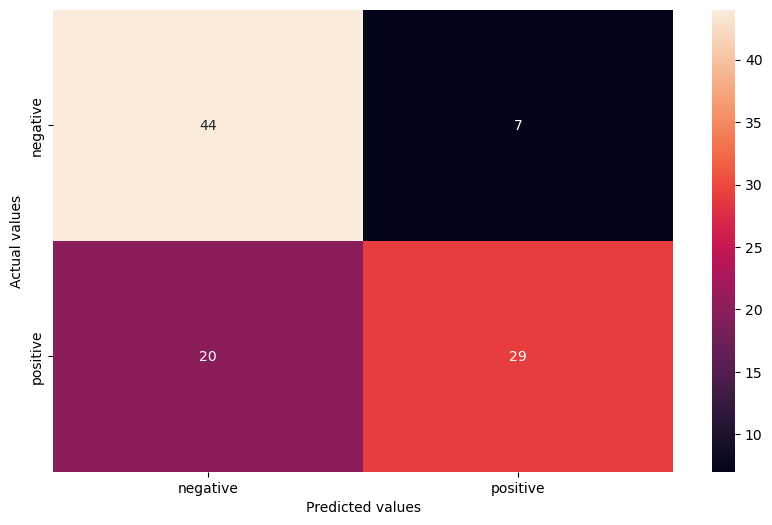

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,xticklabels=['negative','positive'],yticklabels=['negative','positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

**Multinomial NB**

In [16]:
# Multinomial NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.05)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2*100,2),"%")
print("Recall is ",round(score3*100,2),"%")
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)


Accuracy is  82.0 %
Precision is  80.39 %
Recall is  83.67 %
Confusion Matrix:
 [[41 10]
 [ 8 41]]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        51
           1       0.80      0.84      0.82        49

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



Text(95.72222222222221, 0.5, 'Actual values')

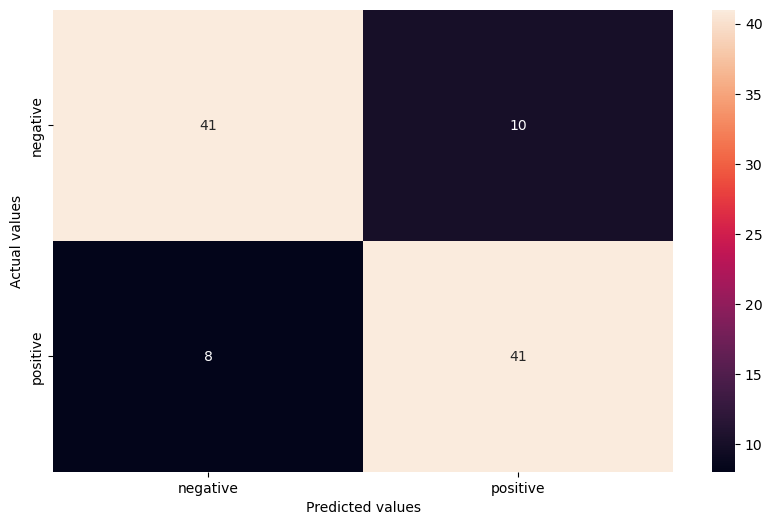

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,xticklabels=['negative','positive'],yticklabels=['negative','positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

**Bernoulli NB**

In [19]:
# Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2*100,2),"%")
print("Recall is ",round(score3*100,2),"%")

Confusion Matrix:
 [[37 14]
 [ 7 42]]


Accuracy is  79.0 %
Precision is  75.0 %
Recall is  85.71 %


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        51
           1       0.75      0.86      0.80        49

    accuracy                           0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



Text(95.72222222222221, 0.5, 'Actual values')

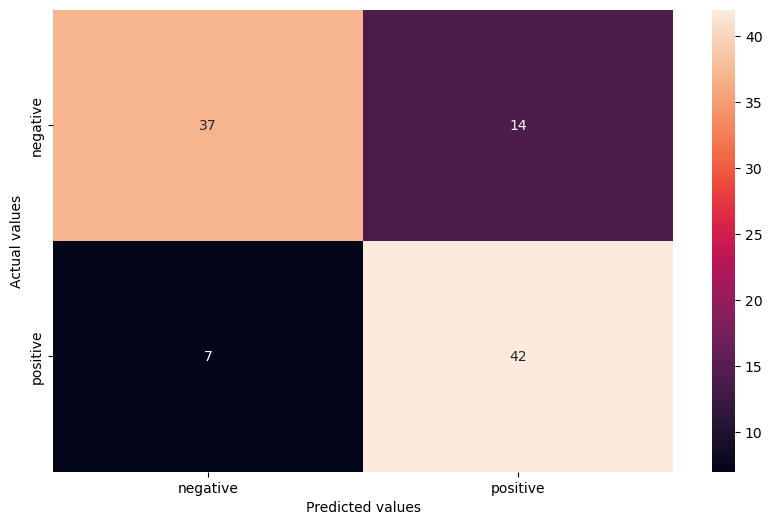

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,xticklabels=['negative','positive'],yticklabels=['negative','positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

**Logistic Regression**

In [22]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2*100,2),"%")
print("Recall is ",round(score3*100,2),"%")

Confusion Matrix:
 [[38 13]
 [13 36]]


Accuracy is  74.0 %
Precision is  73.47 %
Recall is  73.47 %


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        51
           1       0.73      0.73      0.73        49

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



Text(95.72222222222221, 0.5, 'Actual values')

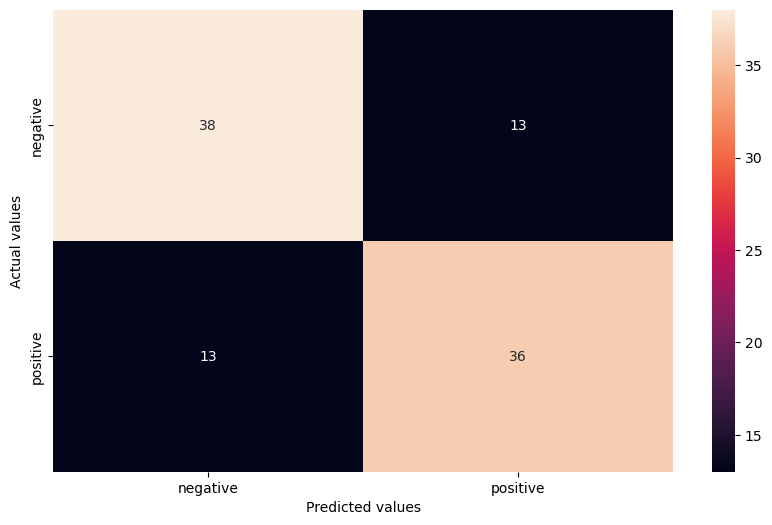

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,xticklabels=['negative','positive'],yticklabels=['negative','positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

### Analysis and Conclusion

In this study, an attempt has been made to classify sentiment analysis for restaurant reviews using machine learning techniques. Two algorithms namely Multinomial Naive Bayes and Bernoulli Naive Bayes are implemented.

Evaluation metrics used here are accuracy, precision and recall.

Using Random Forest,

* Accuracy of prediction is 73%.
* Precision of prediction is 80.56%
* Recall of prediction is 59.18%


Using Multinomial Naive Bayes,

* Accuracy of prediction is 82.0%.
* Precision of prediction is 80.39%
* Recall of prediction is 83.67%

Using Bernoulli Naive Bayes,

* Accuracy of prediction is 79.0%.
* Precision of prediction is 75.0%
* Recall of prediction is 85.71%

Using Logistic Regression,

* Accuracy of prediction is 74.0%.
* Precision of prediction is 73.47%
* Recall of prediction is 0.73.47%


From the above results, Multinomial Naive Bayes is slightly better method compared to Random Forest, Bernoulli Naive Bayes and Logistic Regression, with 82.0% accuracy which means the model built for the prediction of sentiment of the restaurant review gives 82% right prediction.